[3.385e+00 4.800e-01 1.350e+00 5.000e+00 6.330e+00 7.660e+00 4.830e+00
 1.040e+00 4.190e+00 4.250e-01 1.010e-01 3.920e+00 1.000e+00 5.000e-03
 6.000e-02 3.500e+00 2.000e+00 1.700e+00 2.000e+00 2.300e-02 5.100e+00
 5.000e+00 7.850e-01 1.000e+00 3.300e+00 2.000e-01 1.410e+00 6.000e+00
 7.000e+00 8.000e+00 7.500e-01 6.000e+00 6.000e+00 3.500e+00 6.800e+00
 5.000e+00 4.050e+00 1.200e-01 2.300e-02 1.000e-02 1.400e+00 2.566e+00
 2.500e+00 5.500e+00 4.000e+00 2.160e+00 4.550e+00 1.550e+00 7.000e+00
 3.600e+00 4.288e+00 2.800e-01 7.500e-01 1.220e-01 4.800e-01 3.000e+00
 3.000e+00 5.788e+00 9.000e-01 1.620e+00 1.040e-01 4.235e+00 2.300e+00
 1.300e+00 5.000e-01 2.000e-01 4.200e+00 2.440e+00 1.980e+00 9.800e-01
 2.000e-01 3.440e+00 4.500e+00 3.560e+00 3.000e+00 2.883e+00 4.330e+00
 4.500e+00 1.200e+00 1.000e+00]
80
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1]]
(80, 2)
M  =  80

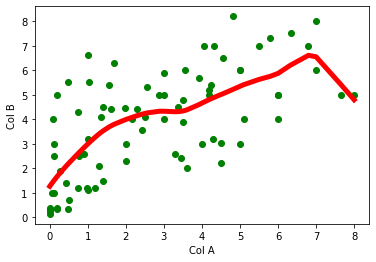

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    print("M  = ", m)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i], xmat, ymat, k)
    return ypred

def localWeight(point, xmat, ymat, k):
    wei = kernal(point, xmat, k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))

    return W

def kernal(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff*diff.T/(-2*k**2))
    return weights

data = pd.read_csv('LR.csv')
colA = np.array(data.colA)
colB = np.array(data.colB)
print(colA)
mcolA = np.mat(colA)
mcolB = np.mat(colB)

m = np.shape(mcolA)[1]
print(m)
one = np.ones((1, m), dtype = int)
print(one)
X = np.hstack((one.T, mcolA.T))
print(X.shape)

ypred = localWeightRegression(X, mcolB, 0.5)
SortIndex = X[:, 1].argsort(0)
#print(SortIndex)
xsort = X[SortIndex][:, 0]
# print(xsort)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(colA, colB, color = 'green')
ax.plot(xsort[:, 1], ypred[SortIndex], color = 'red', linewidth =5)

plt.xlabel('Col A')
plt.ylabel('Col B')
plt.show()
